In [1]:
from sklearn import datasets, cross_validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output 

C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset=pd.read_csv('./input/intial_trainig_stage.csv',index_col='date',parse_dates=['date'])

In [3]:
dataset

,target
date,
2018-01-02 00:00:00,367.0
2018-01-02 00:00:01,397.0
2018-01-02 00:00:02,388.0
2018-01-02 00:00:03,341.0
2018-01-02 00:00:04,361.0
2018-01-02 00:00:05,359.0
2018-01-02 00:00:06,369.0
2018-01-02 00:00:07,387.0
2018-01-02 00:00:08,415.0


In [4]:
datalen=len(dataset)
datalen

172800

In [5]:
trainlen=int(datalen*0.8)
testlen=datalen-trainlen

In [6]:
training_set=dataset.iloc[0:trainlen,0].values
test_set=dataset.iloc[trainlen:datalen,0].values

In [7]:
training_set

array([367., 397., 388., ..., 370., 365., 382.])

In [8]:
test_set

array([387., 397., 384., ..., 412., 395., 431.])

In [9]:
#변경 이전

X_train=[]
y_train=[]
for i in range(0,trainlen-1):
    X_train.append(training_set[i])
    y_train.append(training_set[i+1])

In [23]:
X_train=[]
y_train=[]
i=2
while i<trainlen-3:
    tmp=[training_set[i-2],training_set[i-1],training_set[i]]
    X_train.append(tmp)
    tmp=[training_set[i+1],training_set[i+2],training_set[i+3]]
    y_train.append(tmp)
    i=i+3

In [11]:
training_set

array([367., 397., 388., ..., 370., 365., 382.])

In [12]:
# 변경 이전

X_test=[]
y_test=[]
i=0
for i in range(0,testlen-1):
    X_test.append(test_set[i])
    y_test.append(test_set[i+1])

In [24]:
X_test=[]
y_test=[]
i=2
while i<testlen-3:
    tmp=[test_set[i-2],test_set[i-1],test_set[i]]
    X_test.append(tmp)
    tmp=[test_set[i+1],test_set[i+2],test_set[i+3]]
    y_test.append(tmp)
    i+=3

In [14]:
X_test

[[387.0, 397.0, 384.0],
 [346.0, 364.0, 357.0],
 [373.0, 378.0, 411.0],
 [405.0, 359.0, 380.0],
 [404.0, 384.0, 404.0],
 [393.0, 379.0, 370.0],
 [405.0, 391.0, 404.0],
 [406.0, 414.0, 392.0],
 [430.0, 427.0, 414.0],
 [349.0, 383.0, 398.0],
 [426.0, 431.0, 446.0],
 [387.0, 409.0, 394.0],
 [424.0, 400.0, 405.0],
 [428.0, 419.0, 426.0],
 [400.0, 406.0, 435.0],
 [397.0, 381.0, 384.0],
 [436.0, 423.0, 413.0],
 [381.0, 382.0, 381.0],
 [385.0, 386.0, 399.0],
 [381.0, 375.0, 374.0],
 [397.0, 415.0, 370.0],
 [390.0, 381.0, 363.0],
 [385.0, 358.0, 410.0],
 [402.0, 385.0, 394.0],
 [416.0, 425.0, 409.0],
 [388.0, 383.0, 365.0],
 [414.0, 415.0, 410.0],
 [390.0, 392.0, 396.0],
 [403.0, 408.0, 417.0],
 [374.0, 378.0, 399.0],
 [413.0, 433.0, 429.0],
 [394.0, 417.0, 391.0],
 [406.0, 383.0, 404.0],
 [428.0, 419.0, 388.0],
 [416.0, 395.0, 437.0],
 [419.0, 399.0, 371.0],
 [411.0, 427.0, 421.0],
 [406.0, 381.0, 381.0],
 [376.0, 388.0, 413.0],
 [378.0, 374.0, 363.0],
 [388.0, 422.0, 387.0],
 [380.0, 370.0, 

In [15]:
# 주석
#list -> ndim array로 변환
X_train=np.reshape(X_train,(-1,1))
y_train=np.reshape(y_train,(-1,1))
X_test=np.reshape(X_test,(-1,1))
y_test=np.reshape(y_test,(-1,1))

In [20]:
X_train=np.reshape(X_train,(-1,))

In [21]:
X_train

array([367., 397., 388., ..., 410., 384., 392.])

In [25]:
from skgarden import MondrianForestRegressor
mfr=MondrianForestRegressor(random_state=1,n_estimators=100,max_depth=50,bootstrap=True)
mfr.partial_fit(X_train,y_train)
y_pred,y_std=mfr.predict(X_test,return_std=True)

ValueError: bad input shape (46079, 3)

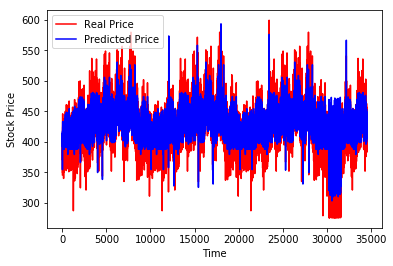

In [18]:
plt.plot(y_test,color='red',label='Real Price')
plt.plot(y_pred,color='blue',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')

plt.legend()
plt.show()

In [19]:
mfr.score(y_test,y_pred)  # regression을 위한 accuracy_score

0.26799621857253797